In [52]:
import pandas as p
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = p.read_csv("data/electricityConsumptionAndProductioction.csv")
df = df.set_index("DateTime")
df.index = p.to_datetime(df.index)

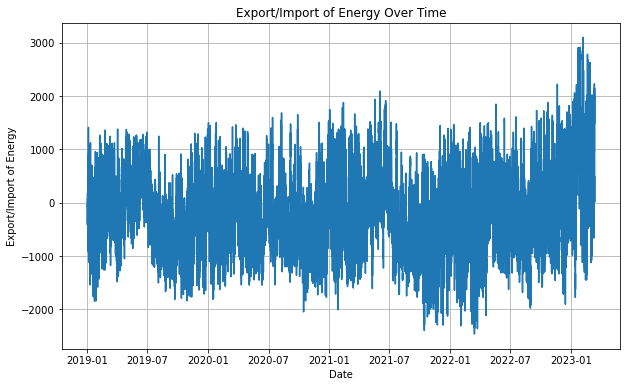

In [58]:
df = p.DataFrame(df)

# Create a new column 'Export/Import' by subtracting 'Production' from 'Consumption'
df['Export/Import'] = df['Production'] - df['Consumption']

plt.figure(figsize=(10, 6))
plt.plot(df['Export/Import'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Export/Import of Energy')
plt.title('Export/Import of Energy Over Time')
plt.grid(True)
plt.show()

In [59]:
n = 250

# Loop through each column and create a new column with the rolling average
for col in df.columns:
    df[f'{col}_rolling_avg'] = df[col].rolling(n, min_periods=1).mean()


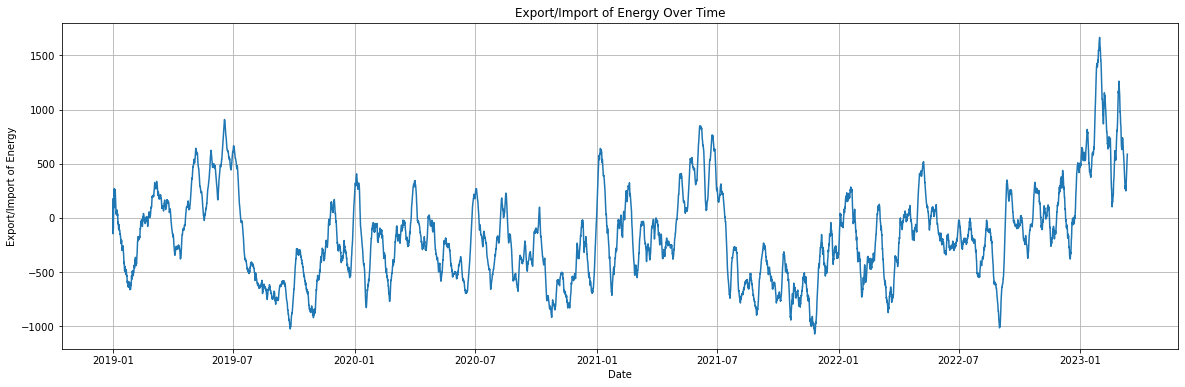

In [56]:
df = p.DataFrame(df)

plt.figure(figsize=(20, 6))
plt.plot(df['Export/Import_rolling_avg'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Export/Import of Energy')
plt.title('Export/Import of Energy Over Time')
plt.grid(True)
plt.show()

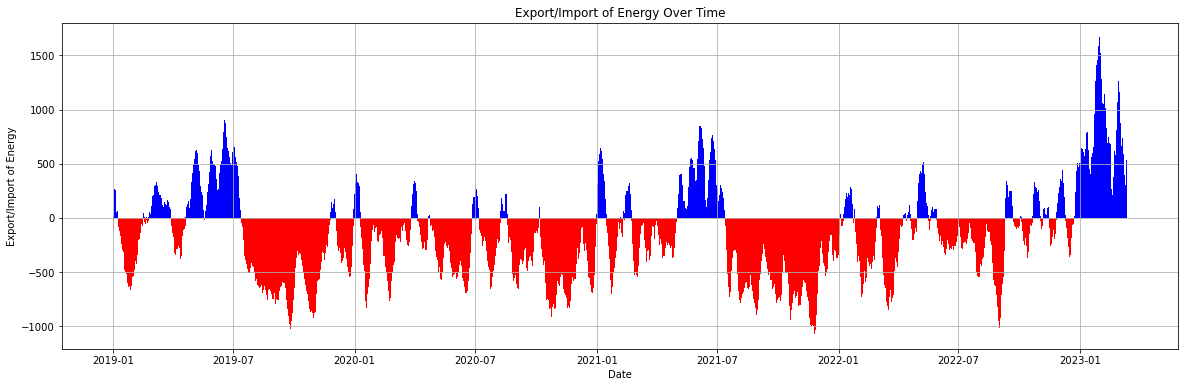

In [60]:
plt.figure(figsize=(20, 6))
plt.bar(
    df.index, df['Export/Import_rolling_avg'],
    color=np.where(df['Export/Import_rolling_avg'] > 0, 'blue', 'red')
)
plt.xlabel('Date')
plt.ylabel('Export/Import of Energy')
plt.title('Export/Import of Energy Over Time')
plt.grid(True)
plt.show()